<a href="https://colab.research.google.com/github/AyushShahh/heart-disease-prediction/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download dataset

In [ ]:
!wget https://archive.ics.uci.edu/static/public/45/heart+disease.zip
!unzip heart+disease.zip

--2025-11-11 06:00:40--  https://archive.ics.uci.edu/static/public/45/heart+disease.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘heart+disease.zip’

heart+disease.zip       [ <=>                ] 125.87K   714KB/s    in 0.2s    

2025-11-11 06:00:41 (714 KB/s) - ‘heart+disease.zip’ saved [128894]

Archive:  heart+disease.zip
  inflating: Index                   
  inflating: WARNING                 
  inflating: ask-detrano             
  inflating: bak                     
  inflating: cleve.mod               
  inflating: cleveland.data          
   creating: costs/
  inflating: costs/Index             
  inflating: costs/heart-disease.README  
  inflating: costs/heart-disease.cost  
  inflating: costs/heart-disease.delay  
  inflating: costs/heart-disease.expense  
  inflating: costs/hear

#Install and import libraries, load the dataset and impute missing values

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [ ]:
data = pd.read_csv("processed.cleveland.data", names=[
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], na_values=['?'])
data.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0

In [ ]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Scale for imputation
scaler = StandardScaler()
df = data.copy()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Impute
imputer = KNNImputer(n_neighbors=5)
df = imputer.fit_transform(df)

# Reverse scaling
df = pd.DataFrame(df, columns=data.columns, index=data.index)
df[numerical_cols] = scaler.inverse_transform(df[numerical_cols])

# Rounding for categorical
for col in ['age', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']:
    if col == 'thal':
        choices = np.array([3, 6, 7])
        df[col] = choices[np.abs(df[col].to_numpy()[:, None] - choices).argmin(axis=1)].astype(int)
        continue
    df[col] = df[col].round().astype(int)

data = df.copy()
# convert values 1, 2, 3 and 4 in target variable to 1
data['target'] = data['target'].map({0: 0, 1: 1, 2:1, 3: 1, 4: 1})
del df
data.head()

age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   1     145.0  233.0    1        2    150.0      0      2.3   
1   67    1   4     160.0  286.0    0        2    108.0      1      1.5   
2   67    1   4     120.0  229.0    0        2    129.0      1      2.6   
3   37    1   3     130.0  250.0    0        0    187.0      0      3.5   
4   41    0   2     130.0  204.0    0        2    172.0      0      1.4   

   slope  ca  thal  target  
0      3   0     6       0  
1      2   3     3       1  
2      2   2     7       1  
3      3   0     3       0  
4      1   0     3       0

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.669967   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.933193   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal      target  
count  303.000000  303.000000  
mean     4.745875    0.458746  
std      1.938997    0.499120  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    1.000000  
max      7.000000    1.000000

Create new features

In [ ]:
data['stress_index'] = data['oldpeak'] * (220 - data['age'] - data['thalach'])
data['perc_max_hr'] = data['thalach'] / (220 - data['age'])
data['exang_oldpeak'] = data['exang'] * data['oldpeak']
data['trestbps_chol'] = data['trestbps'] * data['chol']
data['age_sq'] = np.square(data['age'])

Categorical

In [ ]:
data['age_group'] = pd.cut(data['age'], bins=[0, 40, 54, 64, np.inf], labels=['<=40', '41-54', '55-64', '>=65'])
data['oldpeak_group'] = pd.cut(data['oldpeak'], bins=[-1, 0, 1, 2, np.inf], labels=['None', 'Low', 'Medium', 'High'])
data['bp_category'] = pd.cut(data['trestbps'], bins=[0, 119, 129, 139, np.inf], labels=['Normal', 'Elevated', 'Hypertention S1', 'Hypertention S2'])
data['chol_category'] = pd.cut(data['chol'], bins=[0, 199, 239, np.inf], labels=['Desirable', 'Borderline', 'High'])
data['is_symptomatic'] = pd.cut(data['cp'], bins=[0, 1, np.inf], labels=['Symptomatic', 'Asymptomatic'])
data['has_abnormal_thal'] = pd.cut(data['thal'], bins=[0, 3, np.inf], labels=['Normal', 'Abnormal Thalassemia'])

# Convert to Categorical with labels
data['cp'] = data['cp'].astype('category').cat.rename_categories(['Typical angina', 'Atypical angina', 'Non-aginal pain', 'Asymptomatic'])
data['restecg'] = data['restecg'].astype('category').cat.rename_categories(['Normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'])
data['slope'] = data['slope'].astype('category').cat.rename_categories(['Upsloping', 'Flat', 'Downsloping'])
data['thal'] = data['thal'].astype('category').cat.rename_categories(['Normal', 'Fixed defect', 'Reversible defect'])
data['sex'] = data['sex'].astype('category').cat.rename_categories(['Female', 'Male'])
data['exang'] = data['exang'].astype('category').cat.rename_categories(['No', 'Yes'])
data['fbs'] = data['fbs'].astype('category').cat.rename_categories(['<= 120 mg/dl', '> 120 mg/dl'])

data.head()

age     sex               cp  trestbps   chol           fbs  \
0   63    Male   Typical angina     145.0  233.0   > 120 mg/dl   
1   67    Male     Asymptomatic     160.0  286.0  <= 120 mg/dl   
2   67    Male     Asymptomatic     120.0  229.0  <= 120 mg/dl   
3   37    Male  Non-aginal pain     130.0  250.0  <= 120 mg/dl   
4   41  Female  Atypical angina     130.0  204.0  <= 120 mg/dl   

                        restecg  thalach exang  oldpeak  ... perc_max_hr  \
0  Left ventricular hypertrophy    150.0    No      2.3  ...    0.955414   
1  Left ventricular hypertrophy    108.0   Yes      1.5  ...    0.705882   
2  Left ventricular hypertrophy    129.0   Yes      2.6  ...    0.843137   
3                        Normal    187.0    No      3.5  ...    1.021858   
4  Left ventricular hypertrophy    172.0    No      1.4  ...    0.960894   

   exang_oldpeak trestbps_chol  age_sq  age_group  oldpeak_group  \
0            0.0       33785.0    3969      55-64           High   
1            1.5       45760.0    4489       >=65         Medium   
2            2.6       27480.0    4489       >=65           High   
3            0.0       32500.0    1369       <=40           High   
4            0.0       26520.0    1681      41-54         Medium   

       bp_category  chol_category  is_symptomatic     has_abnormal_thal  
0  Hypertention S2     Borderline     Symptomatic  Abnormal Thalassemia  
1  Hypertention S2           High    Asymptomatic                Normal  
2         Elevated     Borderline    Asymptomatic  Abnormal Thalassemia  
3  Hypertention S1           High    Asymptomatic                Normal  
4  Hypertention S1     Borderline    Asymptomatic                Normal  

[5 rows x 25 columns]

In [ ]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                303 non-null    int64   
 1   sex                303 non-null    category
 2   cp                 303 non-null    category
 3   trestbps           303 non-null    float64 
 4   chol               303 non-null    float64 
 5   fbs                303 non-null    category
 6   restecg            303 non-null    category
 7   thalach            303 non-null    float64 
 8   exang              303 non-null    category
 9   oldpeak            303 non-null    float64 
 10  slope              303 non-null    category
 11  ca                 303 non-null    int64   
 12  thal               303 non-null    category
 13  target             303 non-null    int64   
 14  stress_index       303 non-null    float64 
 15  perc_max_hr        303 non-null    float64 
 16  exang_ol

age   sex            cp    trestbps        chol           fbs  \
count   303.000000   303           303  303.000000  303.000000           303   
unique         NaN     2             4         NaN         NaN             2   
top            NaN  Male  Asymptomatic         NaN         NaN  <= 120 mg/dl   
freq           NaN   206           144         NaN         NaN           258   
mean     54.438944   NaN           NaN  131.689769  246.693069           NaN   
std       9.038662   NaN           NaN   17.599748   51.776918           NaN   
min      29.000000   NaN           NaN   94.000000  126.000000           NaN   
25%      48.000000   NaN           NaN  120.000000  211.000000           NaN   
50%      56.000000   NaN           NaN  130.000000  241.000000           NaN   
75%      61.000000   NaN           NaN  140.000000  275.000000           NaN   
max      77.000000   NaN           NaN  200.000000  564.000000           NaN   

       restecg     thalach exang     oldpeak  ... perc_max_hr  exang_oldpeak  \
count      303  303.000000   303  303.000000  ...  303.000000     303.000000   
unique       3         NaN     2         NaN  ...         NaN            NaN   
top     Normal         NaN    No         NaN  ...         NaN            NaN   
freq       151         NaN   204         NaN  ...         NaN            NaN   
mean       NaN  149.607261   NaN    1.039604  ...    0.903388       0.496370   
std        NaN   22.875003   NaN    1.161075  ...    0.128069       1.006446   
min        NaN   71.000000   NaN    0.000000  ...    0.464052       0.000000   
25%        NaN  133.500000   NaN    0.000000  ...    0.832816       0.000000   
50%        NaN  153.000000   NaN    0.800000  ...    0.928571       0.000000   
75%        NaN  166.000000   NaN    1.600000  ...    1.000000       0.200000   
max        NaN  202.000000   NaN    6.200000  ...    1.174699       5.600000   

       trestbps_chol       age_sq  age_group  oldpeak_group      bp_category  \
count     303.000000   303.000000        303            303              303   
unique           NaN          NaN          4              4                4   
top              NaN          NaN      41-54           None  Hypertention S2   
freq             NaN          NaN        125             99               98   
mean    32605.135314  3045.026403        NaN            NaN              NaN   
std      8612.118656   972.022476        NaN            NaN              NaN   
min     15228.000000   841.000000        NaN            NaN              NaN   
25%     26450.000000  2304.000000        NaN            NaN              NaN   
50%     31800.000000  3136.000000        NaN            NaN              NaN   
75%     36950.000000  3721.000000        NaN            NaN              NaN   
max     64860.000000  5929.000000        NaN            NaN              NaN   

        chol_category  is_symptomatic has_abnormal_thal  
count             303             303               303  
unique              3               2                 2  
top              High    Asymptomatic            Normal  
freq              156             280               166  
mean              NaN             NaN               NaN  
std               NaN             NaN               NaN  
min               NaN             NaN               NaN  
25%               NaN             NaN               NaN  
50%               NaN             NaN               NaN  
75%               NaN             NaN               NaN  
max               NaN             NaN               NaN  

[11 rows x 25 columns]

# Visualizations

Numeric columns

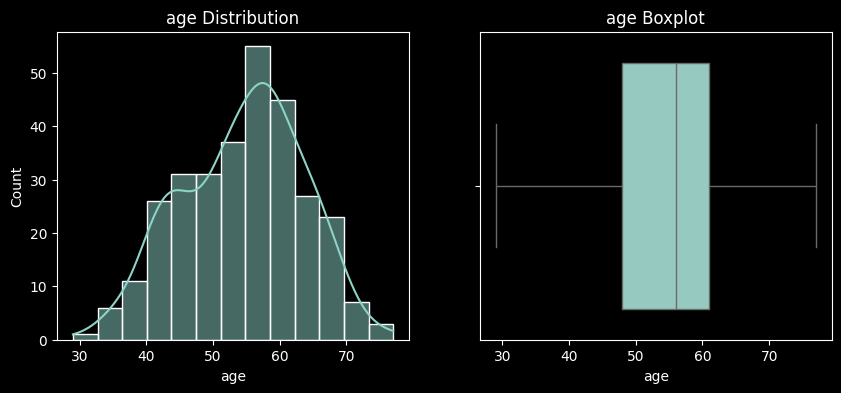

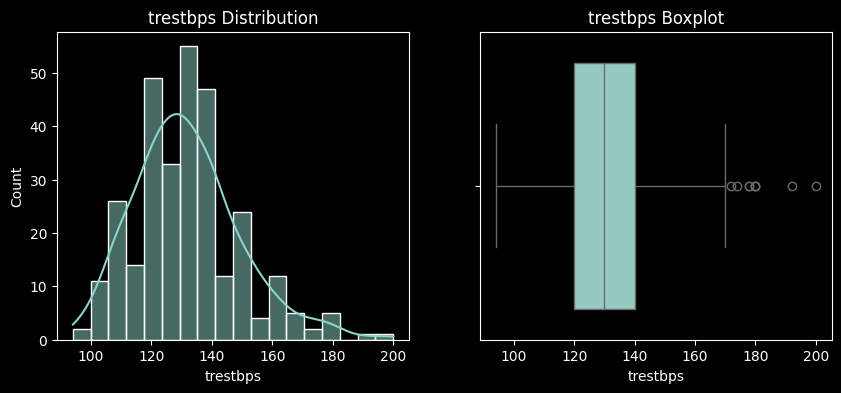

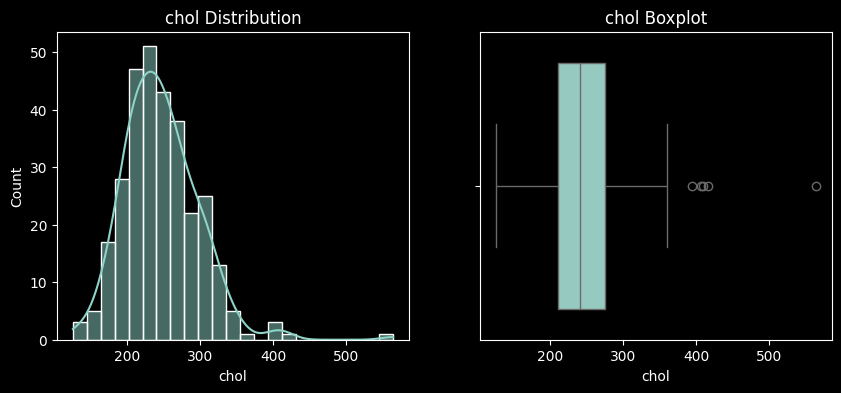

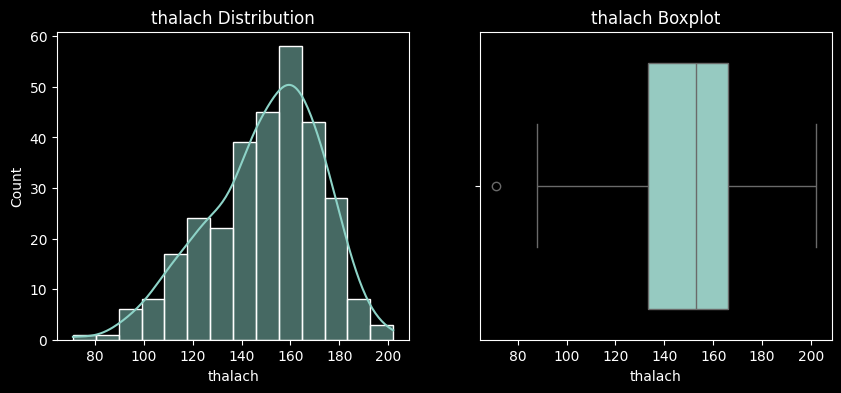

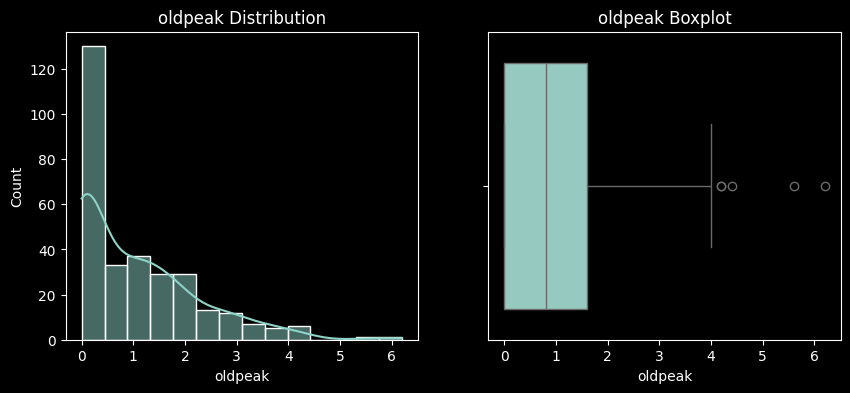

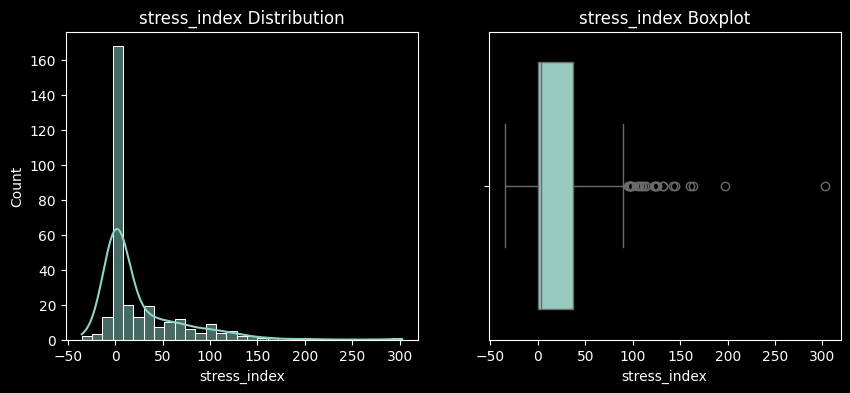

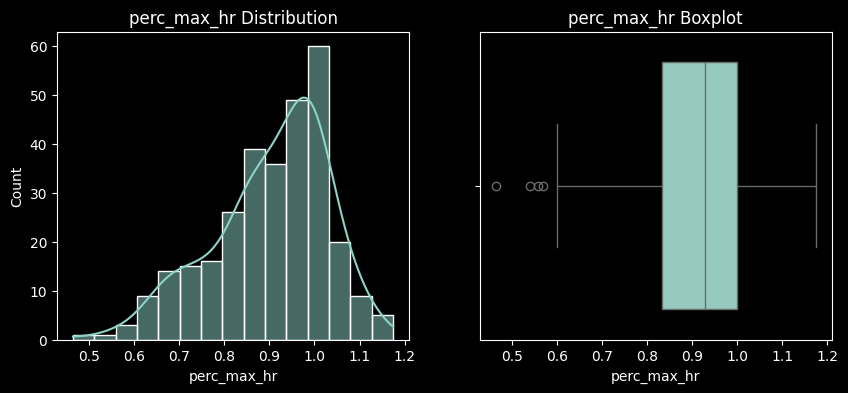

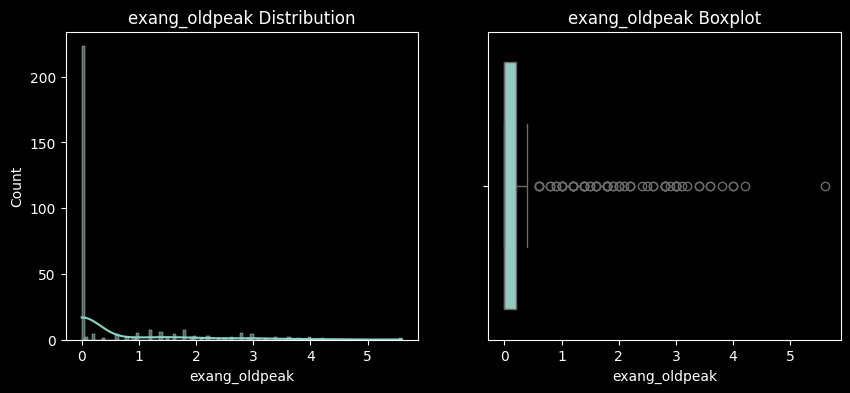

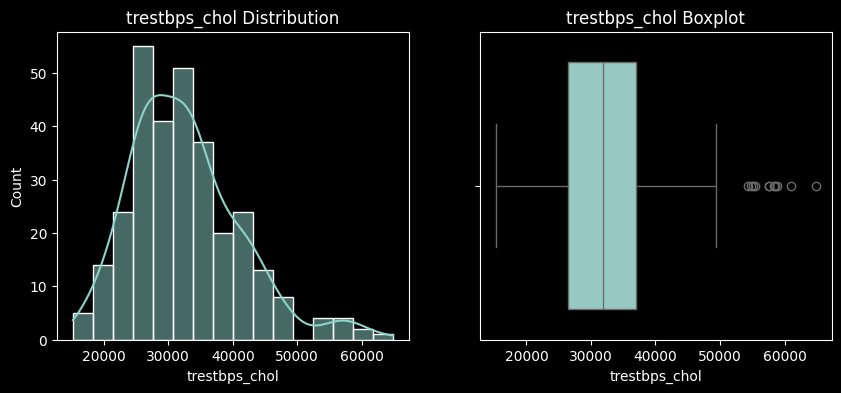

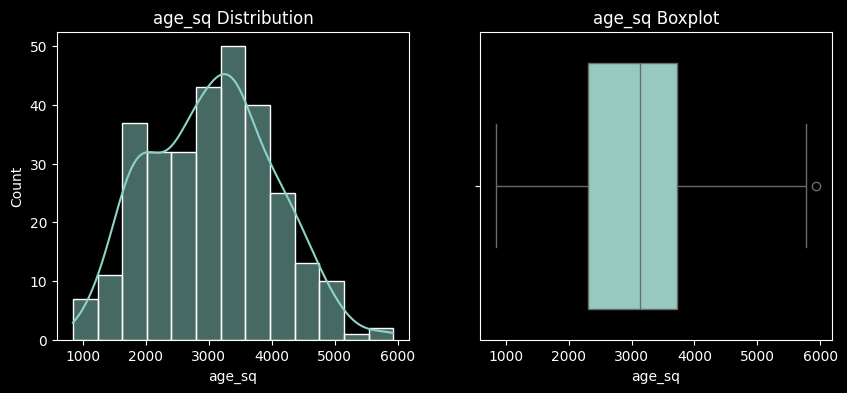

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")

numerical_cols.extend(['stress_index', 'perc_max_hr', 'exang_oldpeak', 'trestbps_chol', 'age_sq'])

for col in numerical_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(f'{col} Distribution')

    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title(f'{col} Boxplot')
    plt.show()

Categorical columns

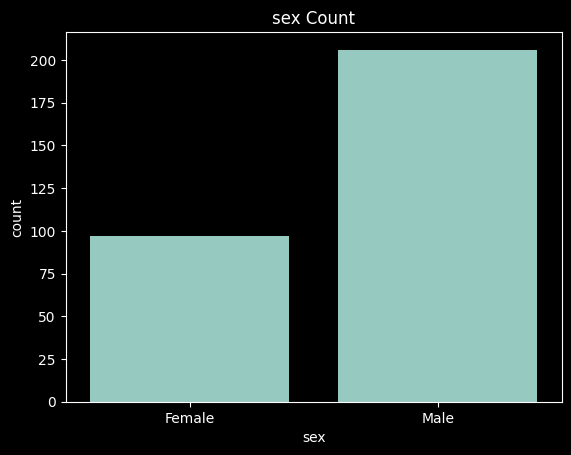

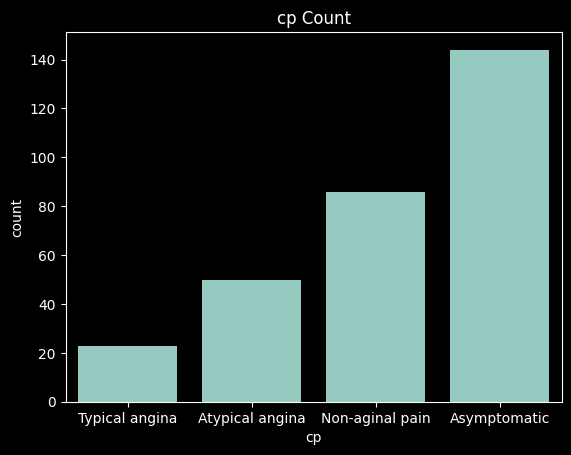

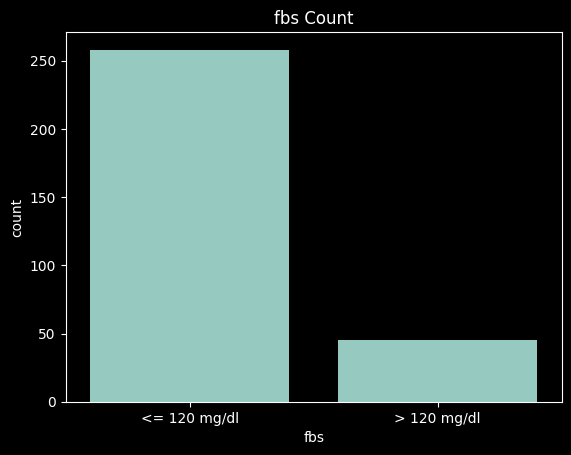

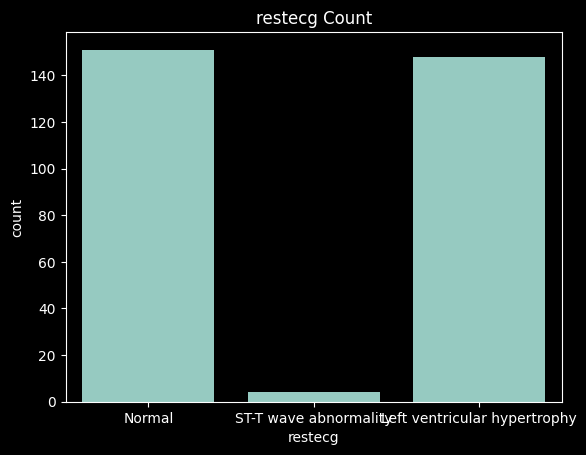

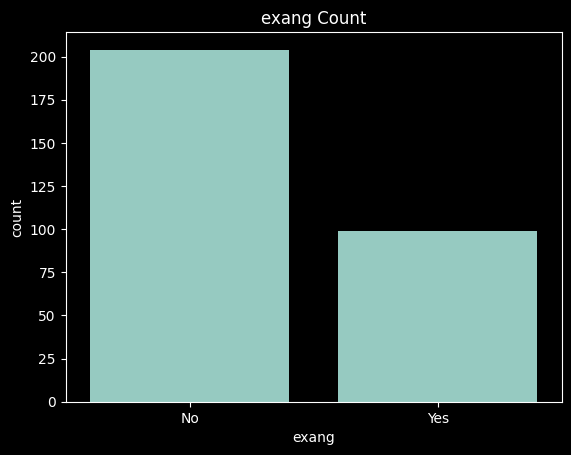

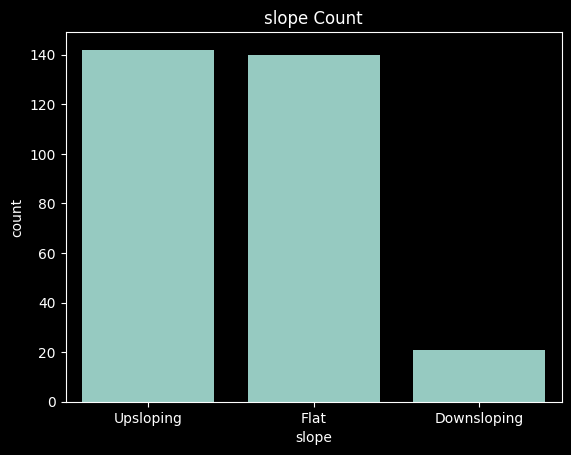

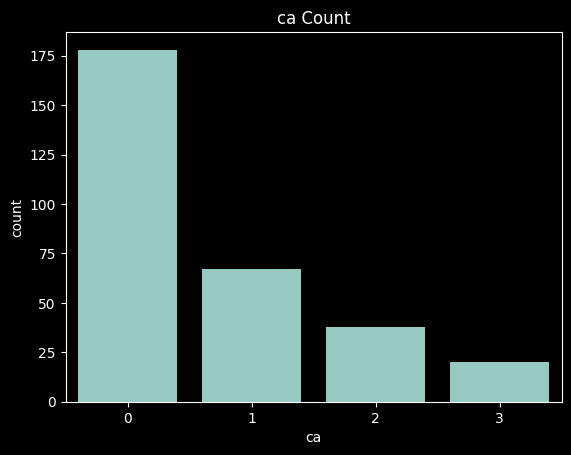

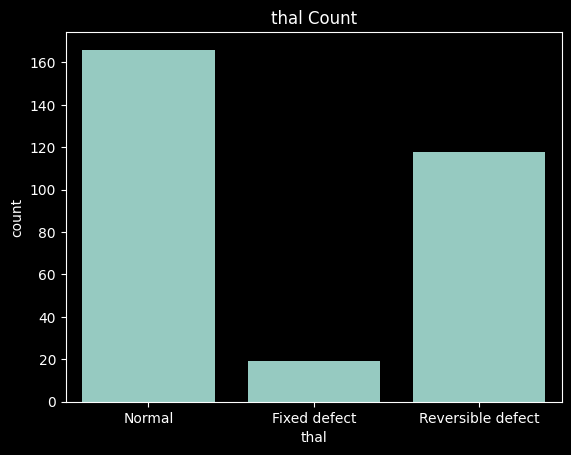

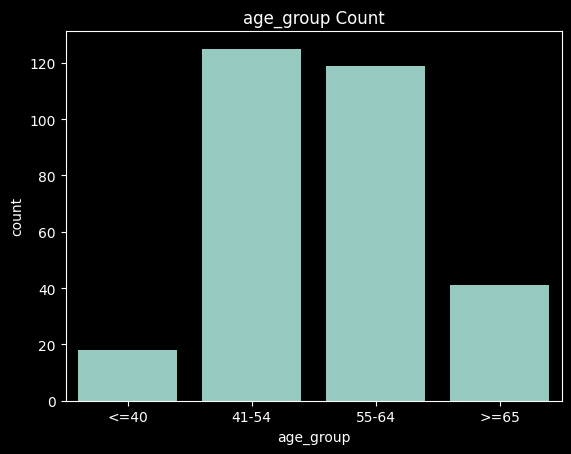

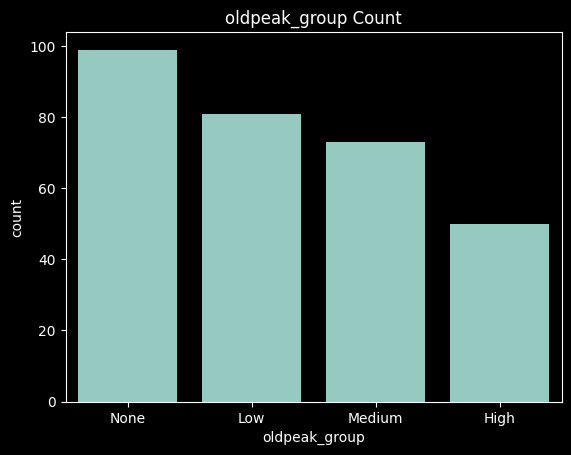

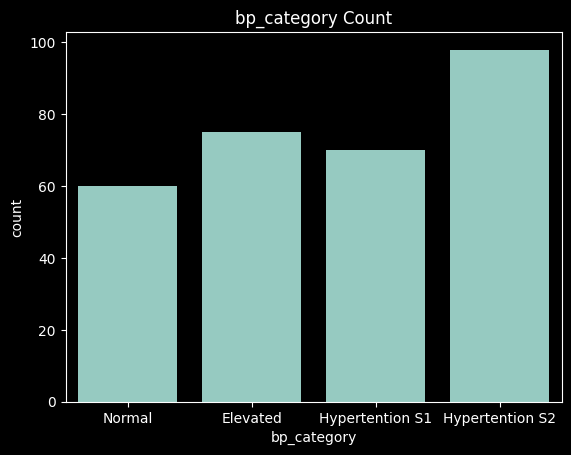

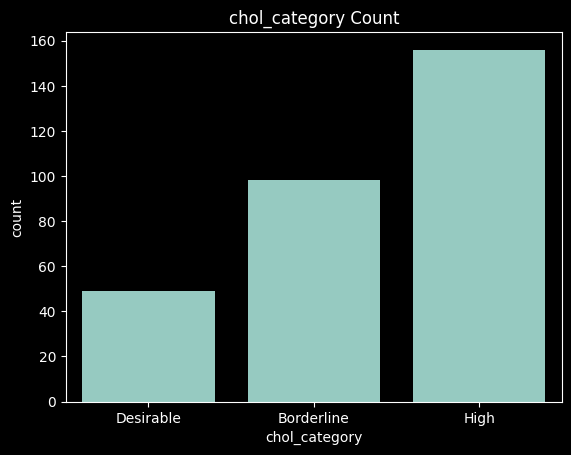

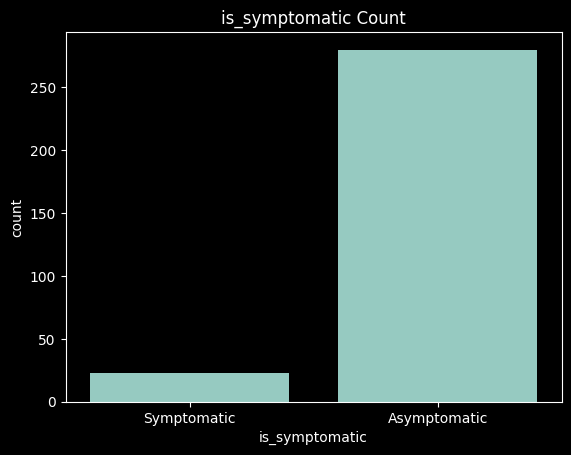

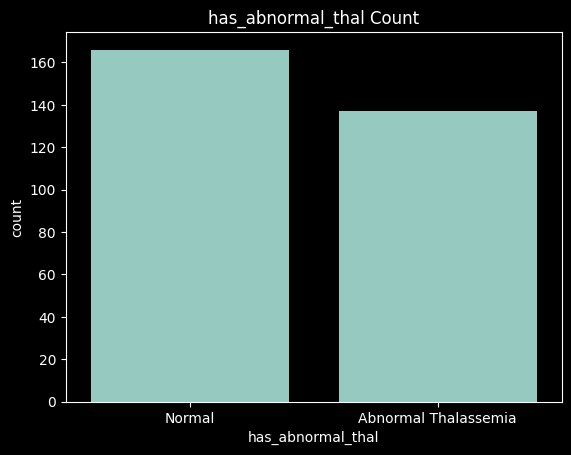

In [ ]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal',
            'age_group', 'oldpeak_group', 'bp_category', 'chol_category', 'is_symptomatic', 'has_abnormal_thal']

for col in cat_cols:
    sns.countplot(x=data[col])
    plt.title(f'{col} Count')
    plt.show()

Correlation heatmap

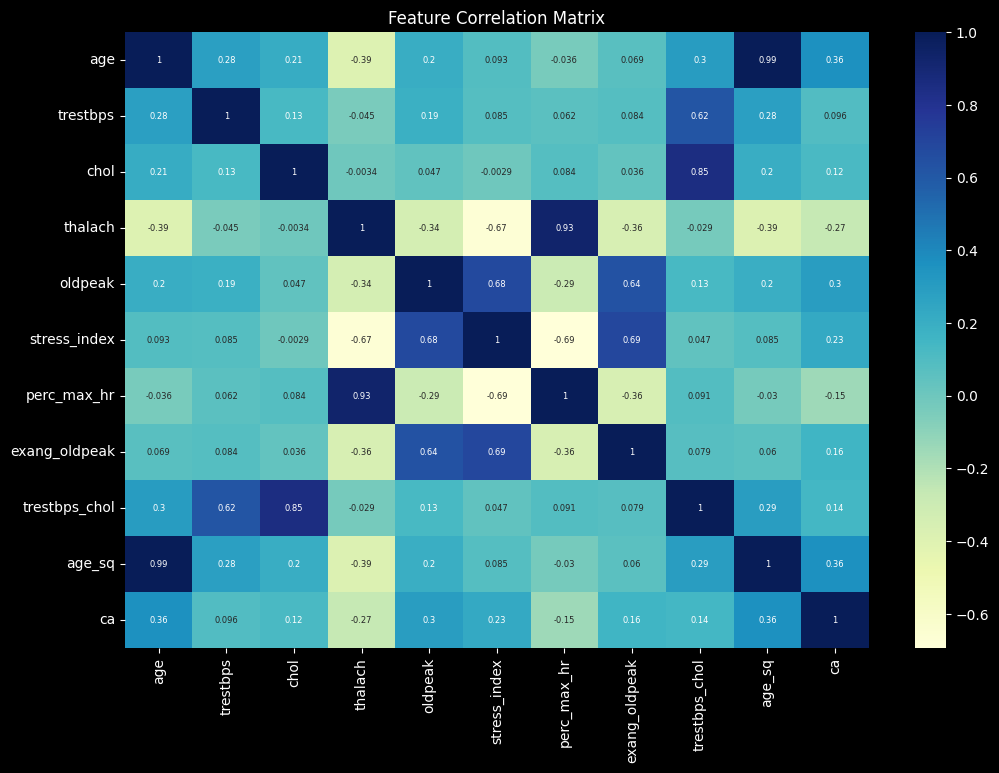

In [ ]:
corr = data[numerical_cols+['ca']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu', annot_kws={"size": 6})
plt.title("Feature Correlation Matrix")
plt.show()

Pairplot

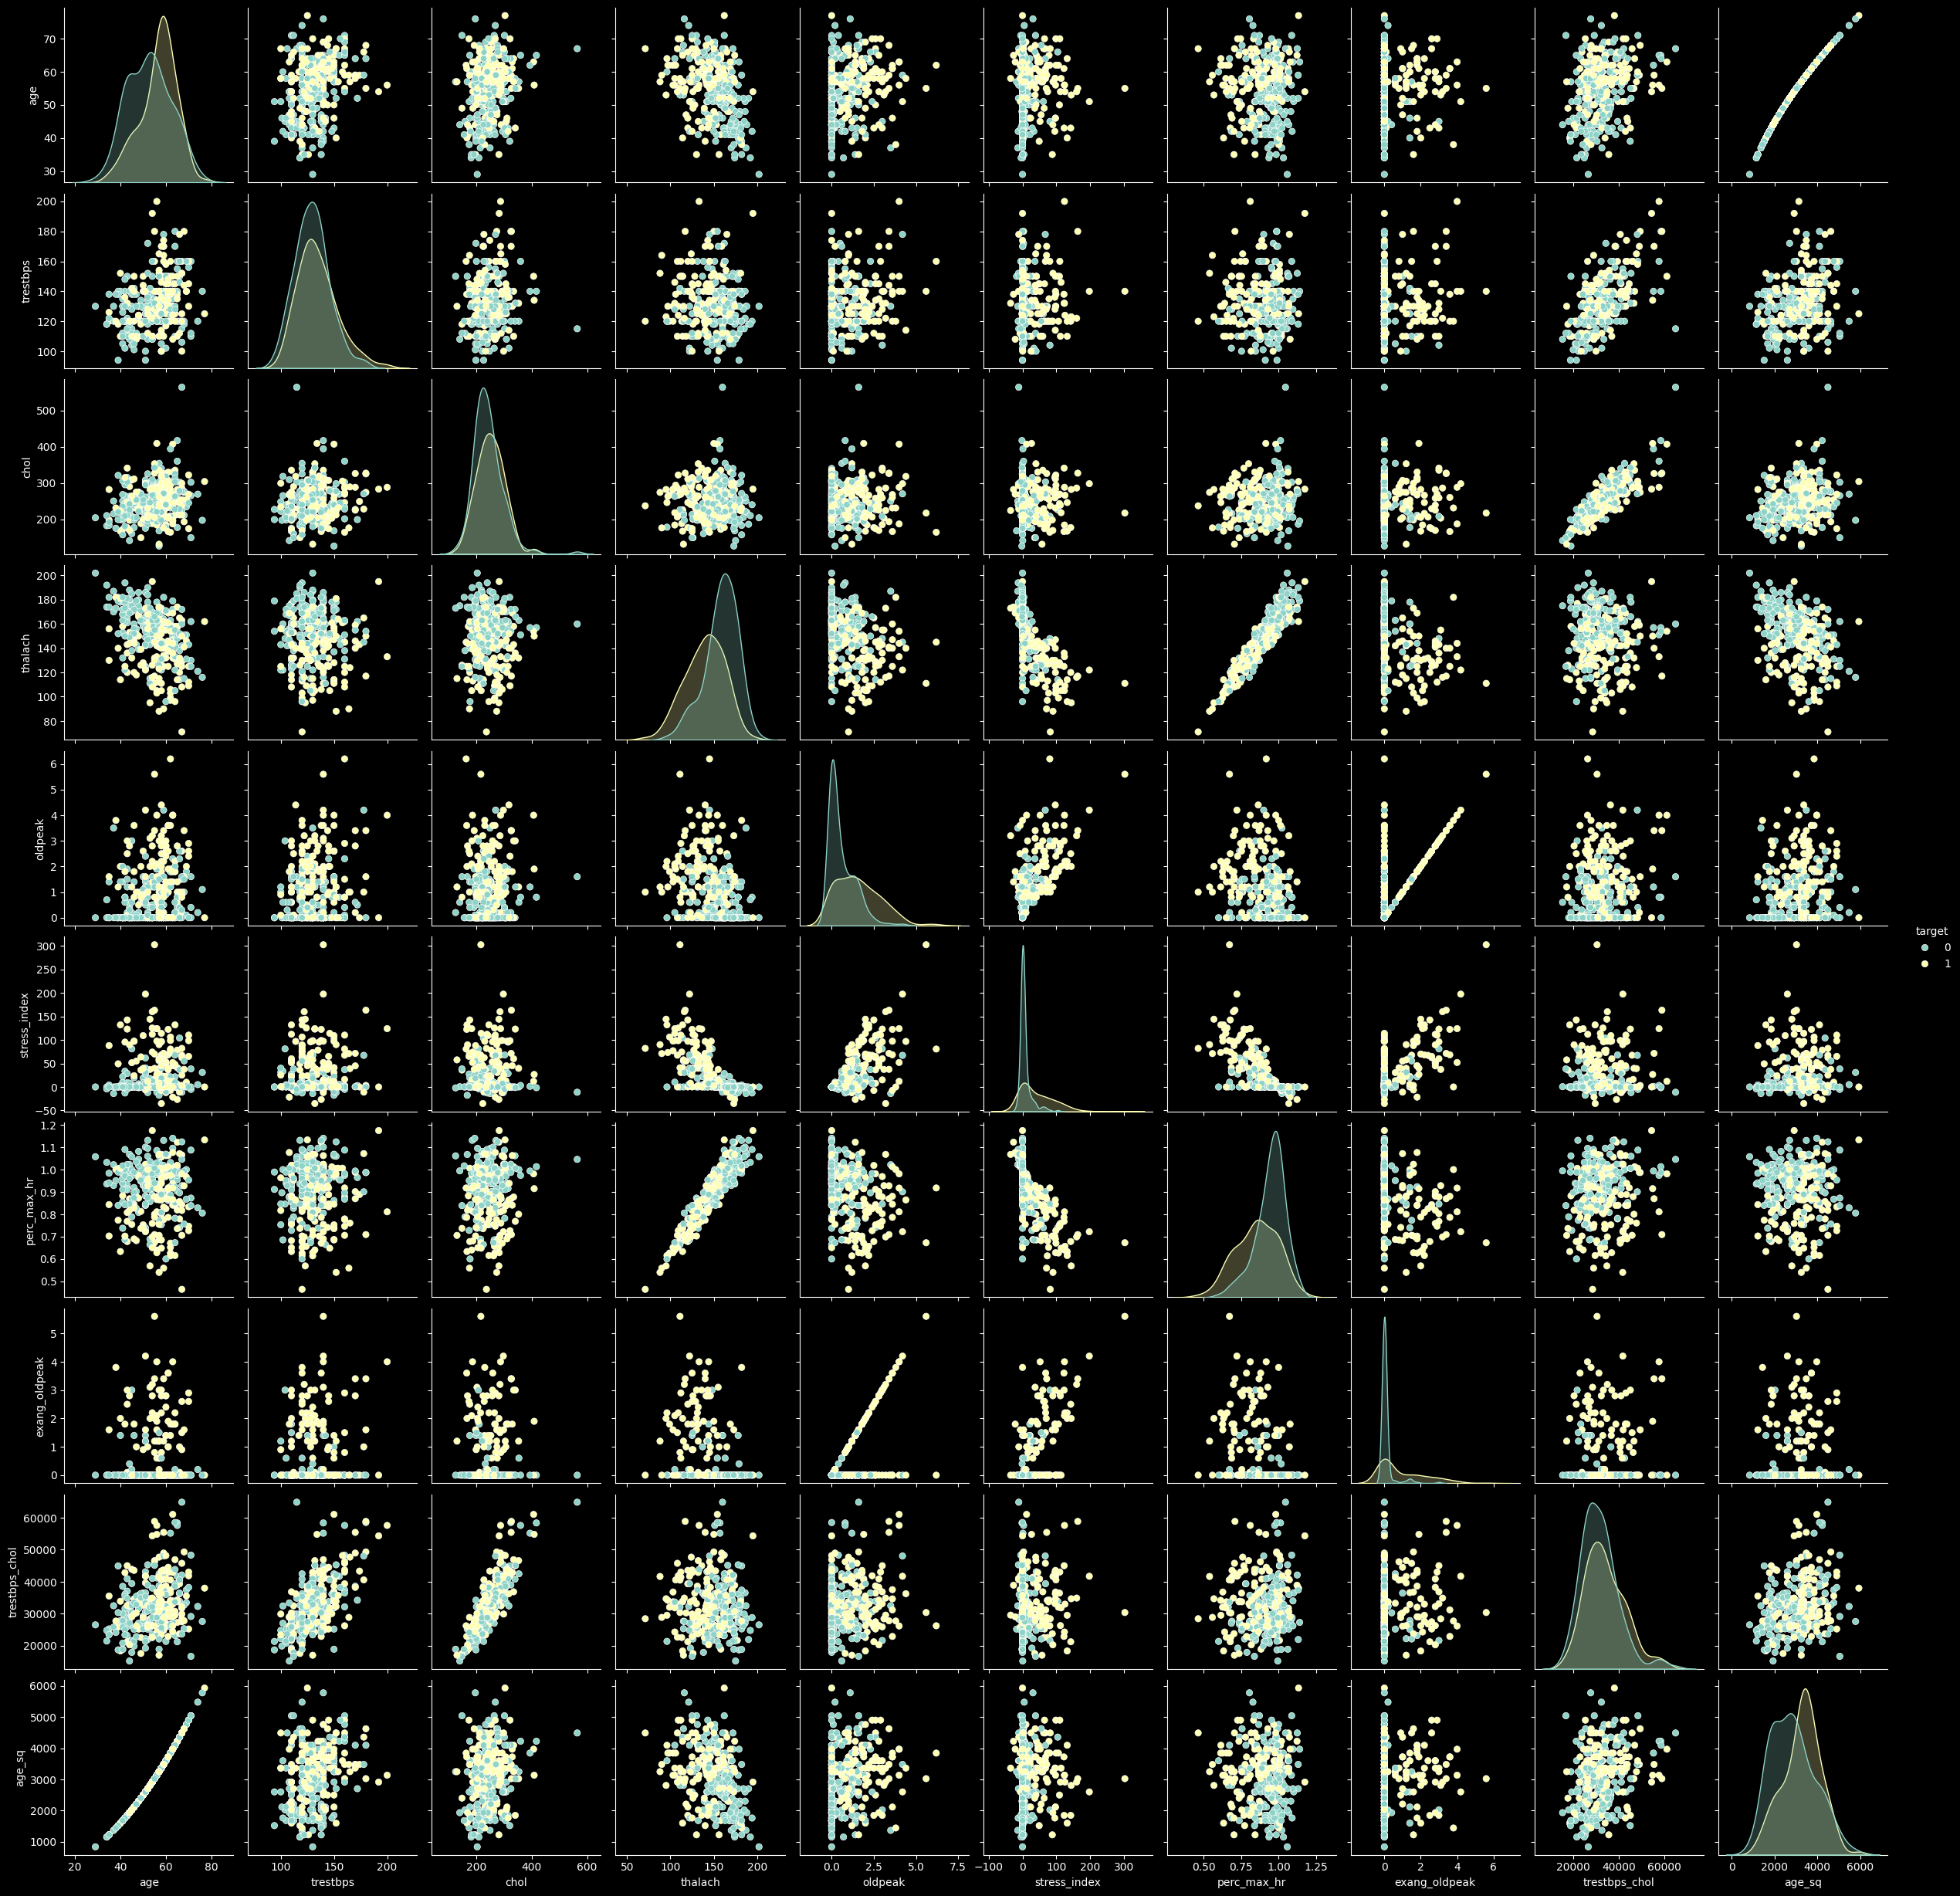

In [ ]:
sns.pairplot(data[numerical_cols+['target']], hue='target')

Crosstab heatmap

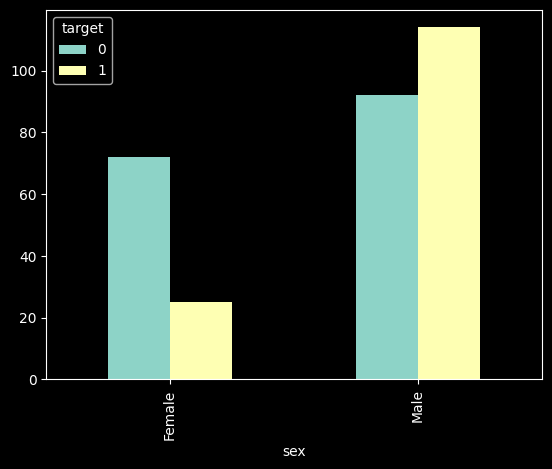

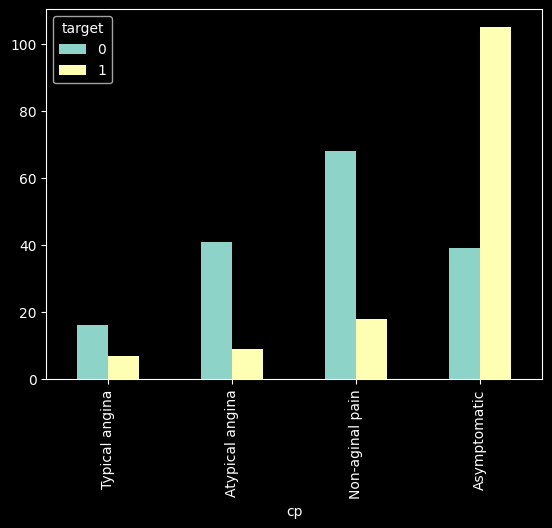

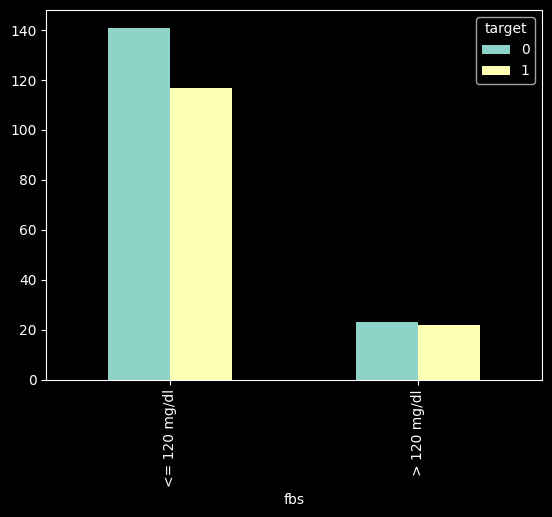

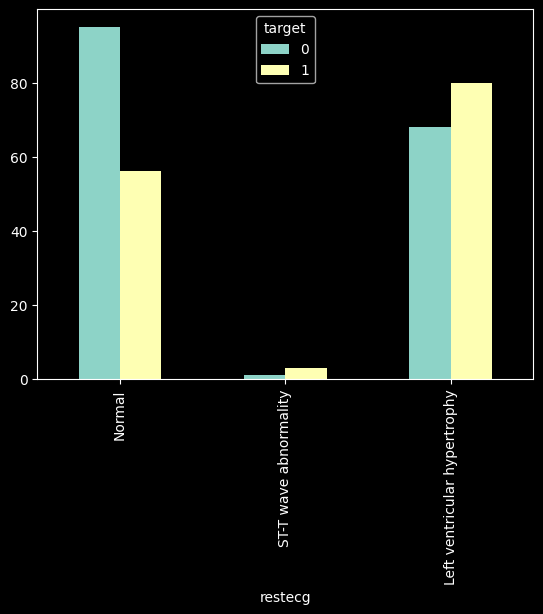

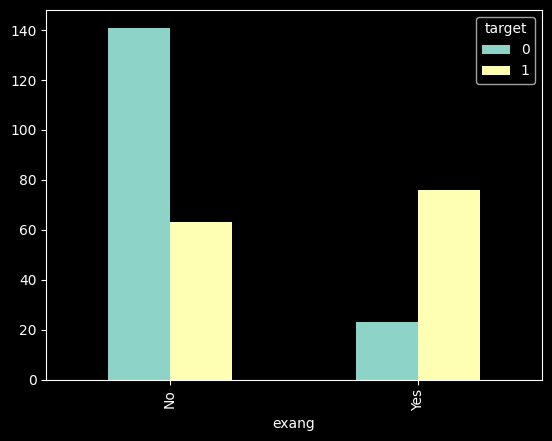

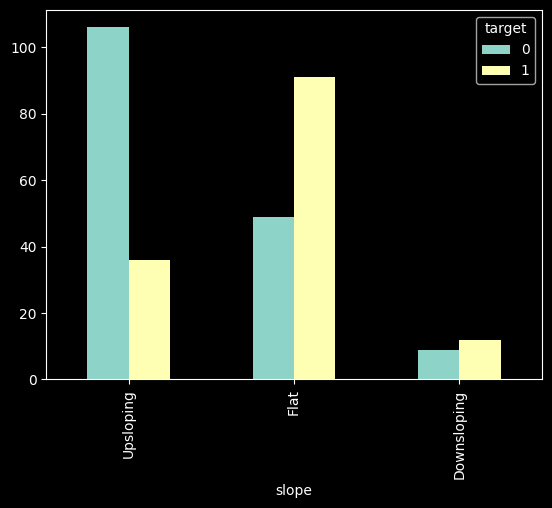

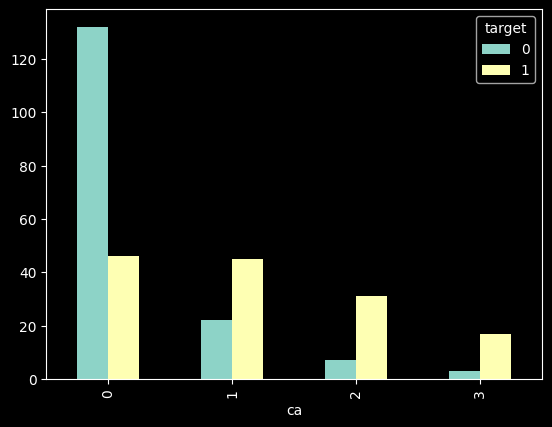

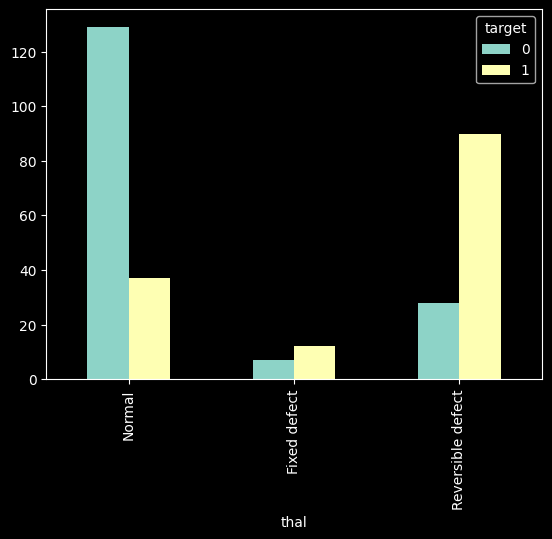

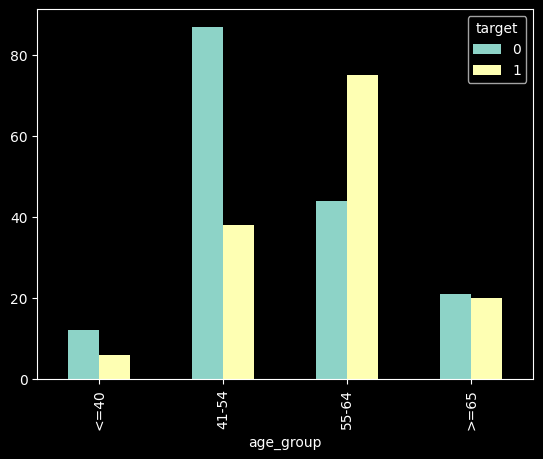

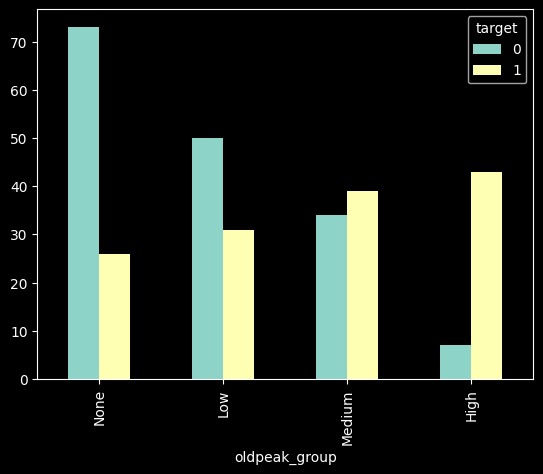

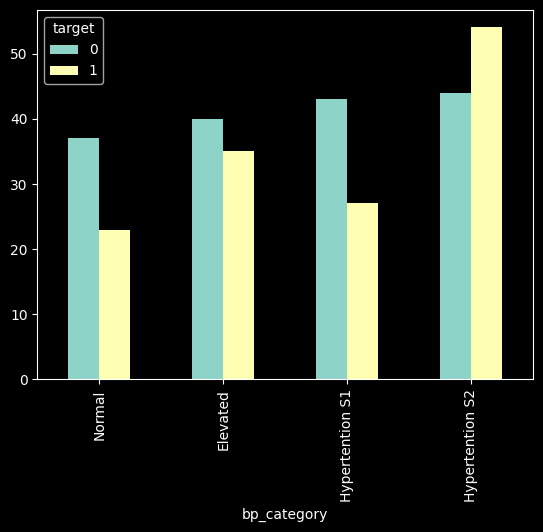

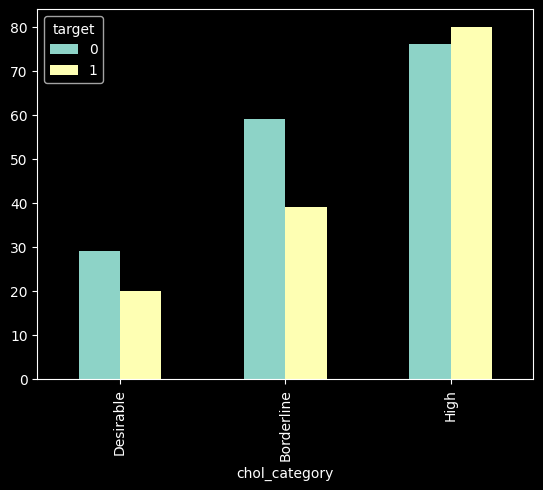

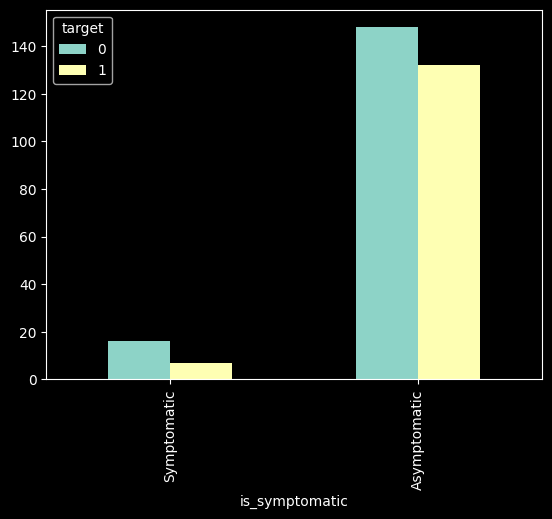

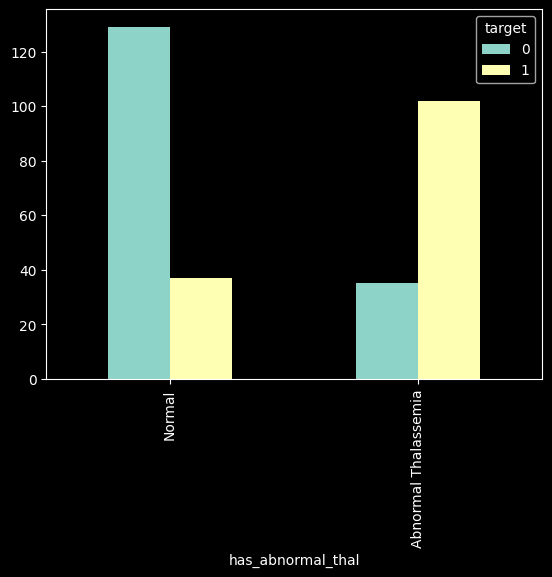

In [ ]:
for col in cat_cols:
    pd.crosstab(data[col], data['target']).plot(kind="bar")

# Perform ensemble learning

Split and scale the data

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

def encode_features(x):
    age_order = {'<=40': 0, '41-54': 1, '55-64': 2, '>=65': 3}
    chol_order = {'Desirable': 0, 'Borderline': 1, 'High': 2}
    bp_order = {'Normal': 0, 'Elevated': 1, 'Hypertention S1': 2, 'Hypertention S2': 3}
    oldpeak_order = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}

    X_encoded = x.copy()
    X_encoded['age_group'] = X_encoded['age_group'].map(age_order).astype(int)
    X_encoded['chol_category'] = X_encoded['chol_category'].map(chol_order).astype(int)
    X_encoded['bp_category'] = X_encoded['bp_category'].map(bp_order).astype(int)
    X_encoded['oldpeak_group'] = X_encoded['oldpeak_group'].map(oldpeak_order).astype(int)
    X_encoded = pd.get_dummies(X_encoded, columns=['sex', 'cp', 'fbs',
                                                'restecg', 'exang', 'slope',
                                                'thal', 'is_symptomatic', 'has_abnormal_thal'], drop_first=True)
    return X_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
X_train_encoded, X_test_encoded = encode_features(X_train), encode_features(X_test)

X_train_encoded_scaled = X_train_encoded.copy()
X_test_encoded_scaled = X_test_encoded.copy()
scaled_cols = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'stress_index', 'perc_max_hr', 'exang_oldpeak',
'trestbps_chol', 'age_sq', 'age_group', 'oldpeak_group', 'bp_category', 'chol_category']
X_train_encoded_scaled[scaled_cols] = scaler.fit_transform(X_train_encoded_scaled[scaled_cols])
X_test_encoded_scaled[scaled_cols] = scaler.transform(X_test_encoded_scaled[scaled_cols])

In [ ]:
# Checking if the distances are proper and data is not skewed and no feature is dominating
from sklearn.metrics import pairwise_distances

dists = pairwise_distances(X_train_encoded_scaled)
print("Mean distance:", np.mean(dists))
print("Std distance:", np.std(dists))
print("Min:", np.min(dists))
print("Max:", np.max(dists))

Mean distance: 5.716105350023853
Std distance: 1.6310647632180602
Min: 0.0
Max: 12.04684536529196


PCA

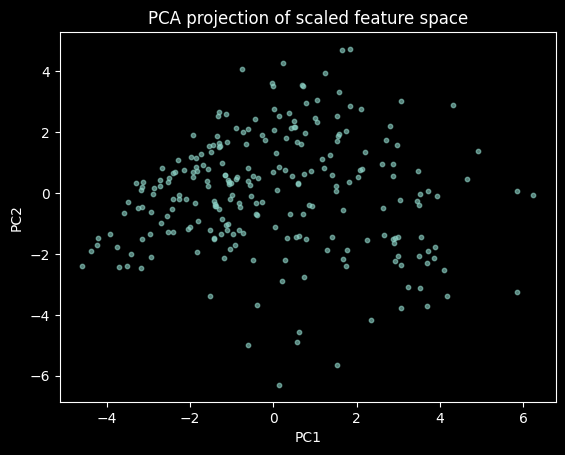

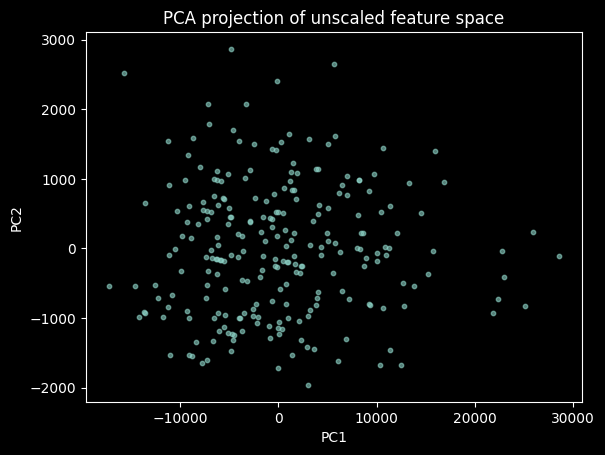

In [ ]:
from sklearn.decomposition import PCA

def get_pca(X):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    return X_pca

X_train_scaled_pca, X_train_pca = get_pca(X_train_encoded_scaled), get_pca(X_train_encoded)

s = 'scaled'
for X_pca in (X_train_scaled_pca, X_train_pca):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.6)
    plt.title(f"PCA projection of {s} feature space")
    s = 'unscaled'
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
del s

Evaluate function

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
)

def evaluate_classifier(model, X_test, y_test, plot=True):
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
    else:
        y_proba = None

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    # Print metrics
    print(f"Classification Report for {model.__class__.__name__}")
    print(f"Accuracy     : {accuracy:.4f}")
    print(f"Precision    : {precision:.4f}")
    print(f"Recall       : {recall:.4f} (Sensitivity)")
    print(f"Specificity  : {specificity:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC AUC      : {auc:.4f}")
    print("Confusion Matrix:\n", cm)

    if plot:
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))

        # Confusion Matrix Plot
        ConfusionMatrixDisplay(cm).plot(ax=ax[0], colorbar=False)
        ax[0].set_title("Confusion Matrix")

        # ROC Curve Plot
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            ax[1].plot(fpr, tpr, label=f"AUC = {auc:.3f}")
            ax[1].plot([0, 1], [0, 1], 'k--')
            ax[1].set_xlabel("False Positive Rate")
            ax[1].set_ylabel("True Positive Rate (Sensitivity)")
            ax[1].set_title("ROC Curve")
            ax[1].legend()
        else:
            ax[1].text(0.5, 0.5, "No probability scores available", ha='center')

        plt.tight_layout()
        plt.show()

Hyperparameter tuning function

In [ ]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

def make_objective(model_class, scoring='f1', encode=True):
    def objective(params):
        if not encode:
            # Get features which are categorical for catboost
            params['cat_features'] = X_train.columns[X_train.dtypes == 'category'].tolist()
            params['verbose'] = False
        model = model_class(**params)
        score = cross_val_score(model, X_train_encoded if encode else X_train, y_train, cv=cv, scoring=scoring).mean()
        return {'loss': -score, 'status': STATUS_OK}
    return objective

XGBoost Classifier

In [ ]:
import xgboost

xgb_space = {
    'n_estimators': hp.choice('n_estimators', range(100, 601, 100)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'gamma': hp.uniform('gamma', 0, 0.4),
    'subsample': hp.uniform('subsample', 0.6, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 0.3),
    'reg_lambda': hp.uniform('reg_lambda', 0.6, 1.0),
    'scale_pos_weight': hp.choice('scale_pos_weight', [1, 2, 3]),
    'tree_method': hp.choice('tree_method', ['hist']),
    'booster': hp.choice('booster', ['gbtree', 'dart']),
}

best_xgb = fmin(fn=make_objective(xgboost.XGBClassifier),
               space=xgb_space,
               algo=tpe.suggest,
               max_evals=230,
               trials=Trials(),
               rstate=np.random.default_rng(23))
print(best_xgb)

100%|██████████| 230/230 [24:35<00:00,  6.41s/trial, best loss: -0.8360445580354048]
{'booster': np.int64(0), 'colsample_bytree': np.float64(0.7537892448491105), 'gamma': np.float64(0.3438579805438742), 'learning_rate': np.float64(0.03641086089494767), 'max_depth': np.int64(2), 'min_child_weight': np.float64(6.0), 'n_estimators': np.int64(1), 'reg_alpha': np.float64(0.27327141632084795), 'reg_lambda': np.float64(0.9808135567766084), 'scale_pos_weight': np.int64(0), 'subsample': np.float64(0.6661578173872176), 'tree_method': np.int64(0)}


In [ ]:
# best_xgb = {'booster': np.int64(0), 'colsample_bytree': np.float64(0.7537892448491105), 'gamma': np.float64(0.3438579805438742), 'learning_rate': np.float64(0.03641086089494767), 'max_depth': np.int64(2), 'min_child_weight': np.float64(6.0), 'n_estimators': np.int64(1), 'reg_alpha': np.float64(0.27327141632084795), 'reg_lambda': np.float64(0.9808135567766084), 'scale_pos_weight': np.int64(0), 'subsample': np.float64(0.6661578173872176), 'tree_method': np.int64(0)}
best_xgb['booster'] = ['gbtree', 'dart'][best_xgb['booster']]
best_xgb['scale_pos_weight'] = [1, 2, 3][best_xgb['scale_pos_weight']]
best_xgb['tree_method'] = ['hist'][best_xgb['tree_method']]
best_xgb['n_estimators'] = range(100, 601, 100)[best_xgb['n_estimators']]
best_xgb['max_depth'] = range(3, 10)[best_xgb['max_depth']]

xgb_model = xgboost.XGBClassifier(**best_xgb)
xgb_model.fit(X_train_encoded, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.7537892448491105), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=np.float64(0.3438579805438742), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.03641086089494767), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=np.float64(6.0), missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

Classification Report for XGBClassifier
Accuracy     : 0.8525
Precision    : 0.8800
Recall       : 0.7857 (Sensitivity)
Specificity  : 0.9091
F1 Score     : 0.8302
ROC AUC      : 0.9188
Confusion Matrix:
 [[30  3]
 [ 6 22]]


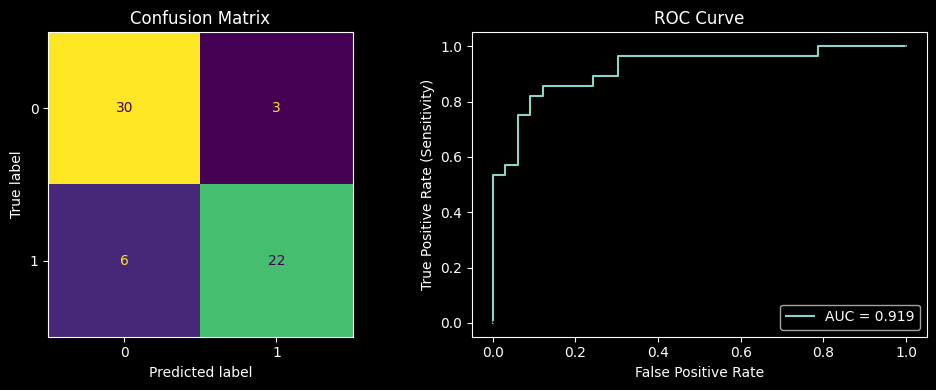

In [ ]:
evaluate_classifier(xgb_model, X_test_encoded, y_test)

Classification Report for XGBClassifier
Accuracy     : 0.8525
Precision    : 0.8519
Recall       : 0.8214 (Sensitivity)
Specificity  : 0.8788
F1 Score     : 0.8364
ROC AUC      : 0.9199
Confusion Matrix:
 [[29  4]
 [ 5 23]]


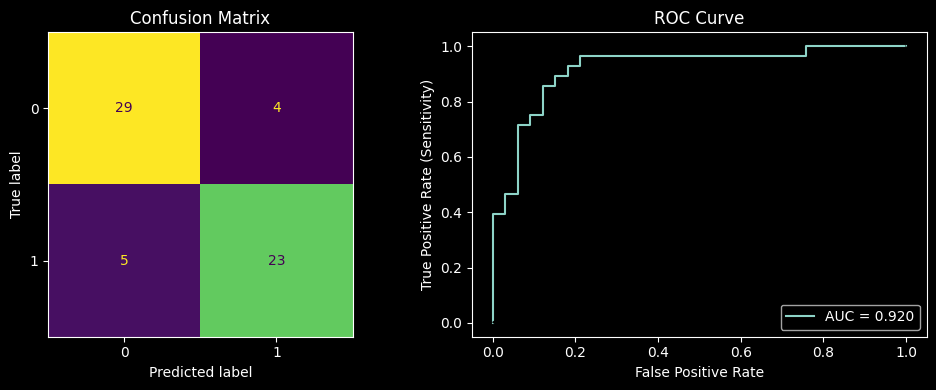

In [ ]:
# Testing without hyperparameter tuning
xgb = xgboost.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=23,
    eval_metric='logloss'
)

xgb.fit(X_train_encoded, y_train)
evaluate_classifier(xgb, X_test_encoded, y_test)

Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_space = {
    'n_estimators': hp.choice('n_estimators', range(200, 801, 100)),
    'max_depth': hp.choice('max_depth', range(4, 21)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None]),
    'bootstrap': hp.choice('bootstrap', [True, False]),
    'criterion': hp.choice('criterion', ['gini', 'entropy', 'log_loss']),
    'class_weight': hp.choice('class_weight', [None, 'balanced'])
}

best_rf = fmin(fn=make_objective(RandomForestClassifier),
               space=rf_space,
               algo=tpe.suggest,
               max_evals=230,
               trials=Trials(),
               rstate=np.random.default_rng(23))

print(best_rf)

100%|██████████| 230/230 [16:15<00:00,  4.24s/trial, best loss: -0.8199798154938849]
{'bootstrap': np.int64(0), 'class_weight': np.int64(1), 'criterion': np.int64(1), 'max_depth': np.int64(10), 'max_features': np.int64(1), 'min_samples_leaf': np.float64(15.0), 'min_samples_split': np.float64(5.0), 'n_estimators': np.int64(1)}


In [ ]:
# best_rf = {'bootstrap': np.int64(0), 'class_weight': np.int64(0), 'criterion': np.int64(2), 'max_depth': np.int64(15), 'max_features': np.int64(0), 'min_samples_leaf': np.float64(7.0), 'min_samples_split': np.float64(6.0), 'n_estimators': np.int64(6)}
best_rf['bootstrap'] = [True, False][best_rf['bootstrap']]
best_rf['class_weight'] = None if best_rf['class_weight'] == 0 else 'balanced'
best_rf['max_depth'] = range(4, 21)[best_rf['max_depth']]
best_rf['min_samples_leaf'] = int(best_rf['min_samples_leaf'])
best_rf['min_samples_split'] = int(best_rf['min_samples_split'])
best_rf['n_estimators'] = range(200, 801, 100)[best_rf['n_estimators']]
best_rf['criterion'] = ['gini', 'entropy', 'log_loss'][best_rf['criterion']]
best_rf['max_features'] = ['sqrt', 'log2', None][best_rf['max_features']]

randomforest_model = RandomForestClassifier(**best_rf)
randomforest_model.fit(X_train_encoded, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=14, max_features='log2', min_samples_leaf=15,
                       min_samples_split=5, n_estimators=300)

Classification Report for RandomForestClassifier
Accuracy     : 0.8197
Precision    : 0.8696
Recall       : 0.7143 (Sensitivity)
Specificity  : 0.9091
F1 Score     : 0.7843
ROC AUC      : 0.9058
Confusion Matrix:
 [[30  3]
 [ 8 20]]


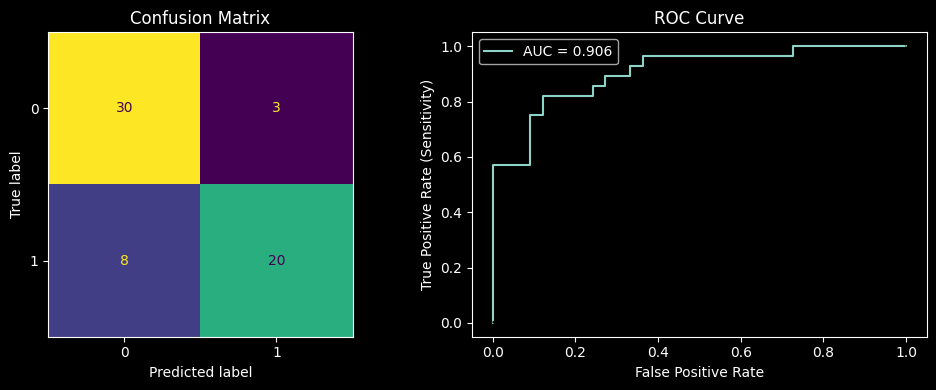

In [ ]:
evaluate_classifier(randomforest_model, X_test_encoded, y_test)

Classification Report for RandomForestClassifier
Accuracy     : 0.8197
Precision    : 0.8400
Recall       : 0.7500 (Sensitivity)
Specificity  : 0.8788
F1 Score     : 0.7925
ROC AUC      : 0.9123
Confusion Matrix:
 [[29  4]
 [ 7 21]]


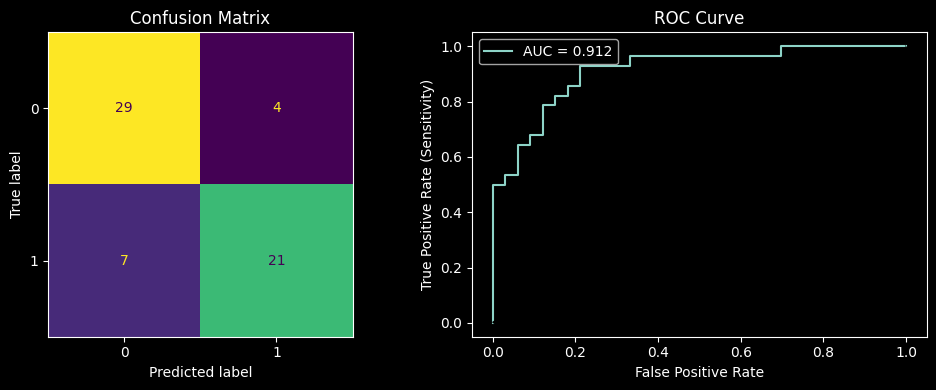

In [ ]:
# Testing without hyperparameter tuning
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    class_weight=None,
    random_state=23,
    n_jobs=-1
)
rf_model.fit(X_train_encoded, y_train)
evaluate_classifier(rf_model, X_test_encoded, y_test)

CatBoost Classifier

In [ ]:
import catboost

cat_space = {
    'depth': hp.choice('depth', range(3, 10)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.3)),
    'iterations': hp.choice('iterations', range(200, 801, 100)),
    'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.choice('border_count', [32, 64, 128, 254]),
    'random_strength': hp.uniform('random_strength', 0, 1),
    'grow_policy': hp.choice('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])
}

best_cat = fmin(fn=make_objective(catboost.CatBoostClassifier, encode=False),
               space=cat_space,
               algo=tpe.suggest,
               max_evals=230,
               trials=Trials(),
               rstate=np.random.default_rng(23))
print(best_cat)

100%|██████████| 230/230 [1:04:18<00:00, 16.78s/trial, best loss: -0.8169643685866035]
{'bagging_temperature': np.float64(0.7435296151129254), 'border_count': np.int64(1), 'depth': np.int64(3), 'grow_policy': np.int64(1), 'iterations': np.int64(3), 'l2_leaf_reg': np.float64(7.1573766780151375), 'learning_rate': np.float64(0.11021640096141062), 'random_strength': np.float64(0.7189760632348519)}


In [ ]:
import catboost
best_cat = {'bagging_temperature': np.float64(0.7435296151129254), 'border_count': np.int64(1), 'depth': np.int64(3), 'grow_policy': np.int64(1), 'iterations': np.int64(3), 'l2_leaf_reg': np.float64(7.1573766780151375), 'learning_rate': np.float64(0.11021640096141062), 'random_strength': np.float64(0.7189760632348519)}
best_cat['border_count'] = [32, 64, 128, 254][best_cat['border_count']]
best_cat['depth'] = range(3, 10)[best_cat['depth']]
best_cat['iterations'] = range(200, 801, 100)[best_cat['iterations']]
best_cat['grow_policy'] = ['SymmetricTree', 'Depthwise', 'Lossguide'][best_cat['grow_policy']]

cat_model = catboost.CatBoostClassifier(**best_cat, cat_features=X_train.columns[X_train.dtypes == 'category'].tolist(), verbose=False)
cat_model.fit(X_train, y_train)

Classification Report for CatBoostClassifier
Accuracy     : 0.8689
Precision    : 0.8846
Recall       : 0.8214 (Sensitivity)
Specificity  : 0.9091
F1 Score     : 0.8519
ROC AUC      : 0.9091
Confusion Matrix:
 [[30  3]
 [ 5 23]]


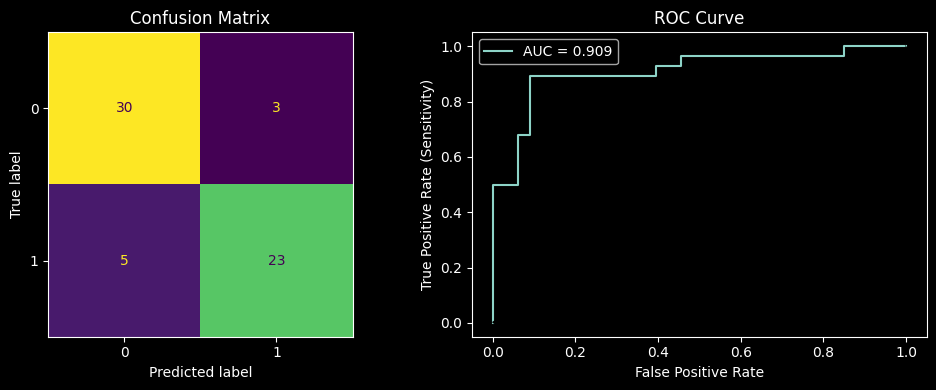

In [ ]:
evaluate_classifier(cat_model, X_test, y_test)

Classification Report for CatBoostClassifier
Accuracy     : 0.8361
Precision    : 0.8462
Recall       : 0.7857 (Sensitivity)
Specificity  : 0.8788
F1 Score     : 0.8148
ROC AUC      : 0.9188
Confusion Matrix:
 [[29  4]
 [ 6 22]]


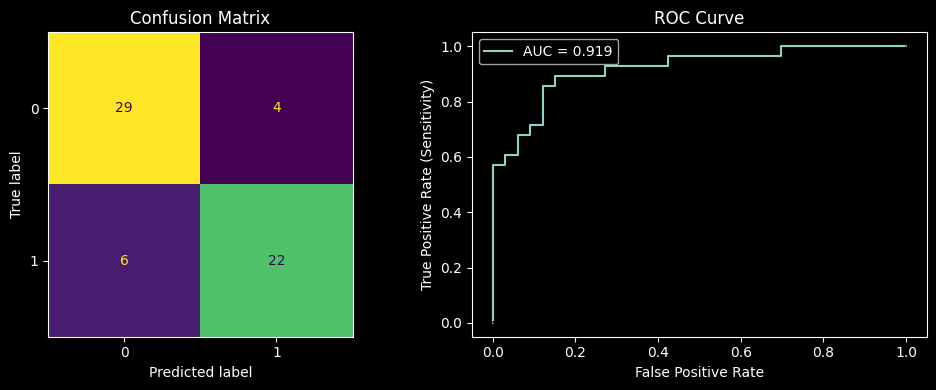

In [ ]:
# Testing without hyperparameter tuning
cat = catboost.CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=5,
    l2_leaf_reg=3,
    subsample=0.9,
    random_seed=23,
    cat_features=X_train.columns[X_train.dtypes == 'category'].tolist(),
    eval_metric='Accuracy',
    verbose=False
)

cat.fit(X_train, y_train)
evaluate_classifier(cat, X_test, y_test)

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def knn_objective(params):
    model = KNeighborsClassifier(**params)
    score = cross_val_score(model, X_train_encoded_scaled, y_train, cv=cv, scoring='f1').mean()
    return {'loss': -score, 'status': STATUS_OK}

knn_space = {
    'n_neighbors': hp.choice('n_neighbors', range(3, 31, 2)),
    'weights': hp.choice('weights', ['uniform', 'distance']),
    'p': hp.choice('p', [1, 2]),
    'algorithm': hp.choice('algorithm', ['auto', 'ball_tree', 'kd_tree']),
    'leaf_size': scope.int(hp.quniform('leaf_size', 20, 60, 5))
}

best_knn = fmin(fn=knn_objective,
               space=knn_space,
               algo=tpe.suggest,
               max_evals=230,
               trials=Trials(),
               rstate=np.random.default_rng(23))
print(best_knn)

100%|██████████| 230/230 [00:15<00:00, 14.48trial/s, best loss: -0.7712836438923396]
{'algorithm': np.int64(2), 'leaf_size': np.float64(50.0), 'n_neighbors': np.int64(2), 'p': np.int64(0), 'weights': np.int64(1)}


In [ ]:
# best_knn = {'algorithm': np.int64(2), 'leaf_size': np.float64(50.0), 'n_neighbors': np.int64(2), 'p': np.int64(0), 'weights': np.int64(1)}
best_knn['n_neighbors'] = range(3, 31, 2)[best_knn['n_neighbors']]
best_knn['algorithm'] = ['auto', 'ball_tree', 'kd_tree'][best_knn['algorithm']]
best_knn['leaf_size'] = int(best_knn['leaf_size'])
best_knn['p'] = [1, 2][best_knn['p']]
best_knn['weights'] = ['uniform', 'distance'][best_knn['weights']]

knn_model = KNeighborsClassifier(**best_knn)
knn_model.fit(X_train_encoded_scaled, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=50, n_neighbors=7, p=1,
                     weights='distance')

Classification Report for KNeighborsClassifier
Accuracy     : 0.8033
Precision    : 0.8077
Recall       : 0.7500 (Sensitivity)
Specificity  : 0.8485
F1 Score     : 0.7778
ROC AUC      : 0.9102
Confusion Matrix:
 [[28  5]
 [ 7 21]]


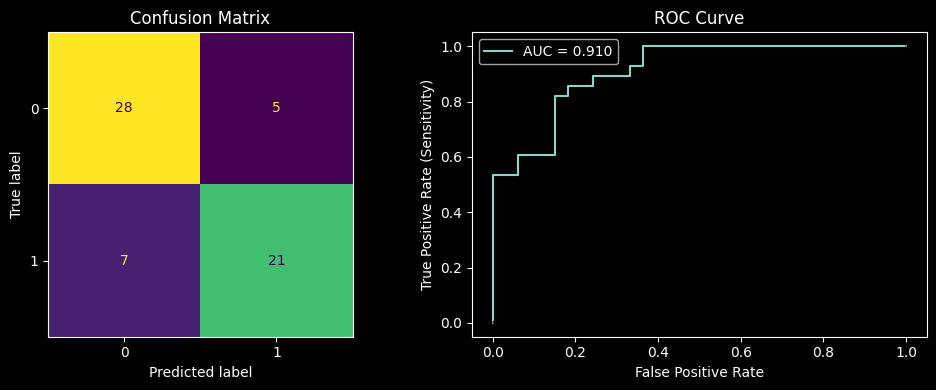

In [ ]:
evaluate_classifier(knn_model, X_test_encoded_scaled, y_test)

Classification Report for KNeighborsClassifier
Accuracy     : 0.8361
Precision    : 0.8214
Recall       : 0.8214 (Sensitivity)
Specificity  : 0.8485
F1 Score     : 0.8214
ROC AUC      : 0.8961
Confusion Matrix:
 [[28  5]
 [ 5 23]]


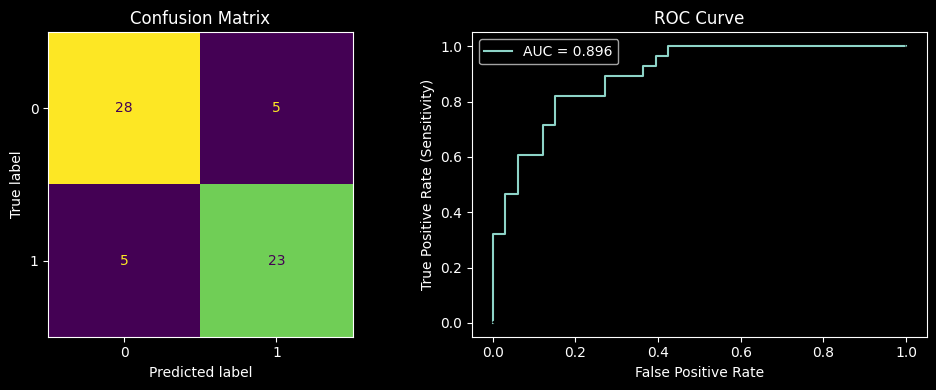

In [ ]:
# Testing without hyperparameter tuning
knn = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    p=2,
    metric='minkowski',
    n_jobs=-1
)
knn.fit(X_train_encoded_scaled, y_train)
evaluate_classifier(knn, X_test_encoded_scaled, y_test)

Model decision boundaries

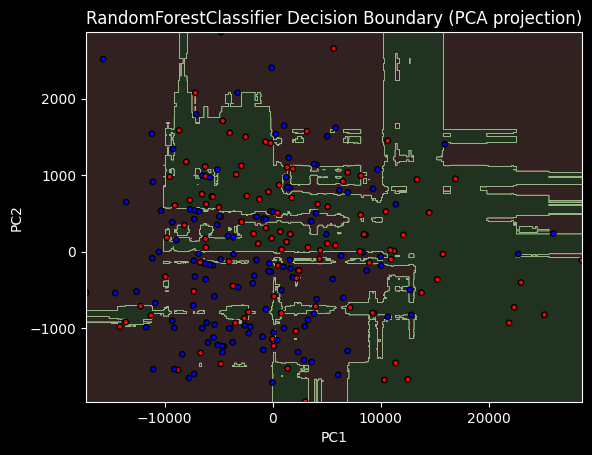

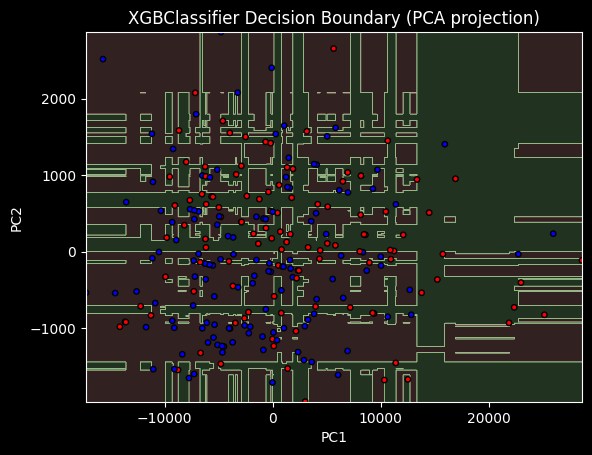

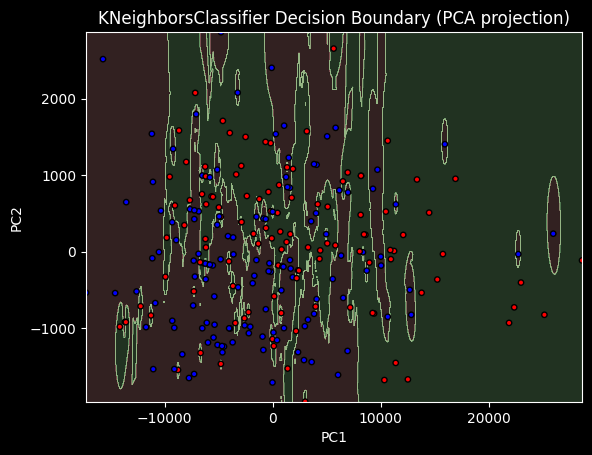

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.base import clone

for m in (rf_model, xgb, knn):
    X_proj = X_train_scaled_pca if m == knn_model else X_train_pca

    x_min, x_max = X_proj[:, 0].min() - 1, X_proj[:, 0].max() + 1
    y_min, y_max = X_proj[:, 1].min() - 1, X_proj[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                        np.linspace(y_min, y_max, 1000))

    model = clone(m)
    model.fit(X_proj, y_train)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=ListedColormap(['#FFAAAA', '#AAFFAA']))
    plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y_train, s=15, cmap='bwr', edgecolor='k')
    plt.title(f"{model.__class__.__name__} Decision Boundary (PCA projection)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

The performance and hyperparams have been verified. Now building the pipeline for ensemble learning

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encode_func):
        self.encode_func = encode_func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return self.encode_func(X)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

xgb_pipeline = Pipeline([
    ('encode', FeatureEncoder(encode_features)),
    ('model', clone(xgb))
])

rf_pipeline = Pipeline([
    ('encode', FeatureEncoder(encode_features)),
    ('model', clone(rf_model))
])

cat_pipeline = Pipeline([
    ('model', clone(cat_model))
])

scaler = ColumnTransformer([
    ('scale', StandardScaler(), scaled_cols)
], remainder='passthrough')

knn_pipeline = Pipeline([
    ('encode', FeatureEncoder(encode_features)),
    ('scale', StandardScaler()),
    ('model', clone(knn))
])

Create a stacking classifier with hyperparameter tuning

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
    ('rf', rf_pipeline),
    ('xgb', xgb_pipeline),
    ('cat', cat_pipeline),
    ('knn', knn_pipeline)
]

def final_objective(params):
    meta_clf = LogisticRegression(
        C=params['C'],
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        random_state=23
    )

    stack_model = StackingClassifier(
        estimators=estimators,
        final_estimator=meta_clf,
        stack_method='predict_proba',
        cv=cv,
        n_jobs=-1
    )

    score = cross_val_score(stack_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}

space = {
    'C': hp.loguniform('C', np.log(1e-3), np.log(10))
}

best_meta = fmin(
    fn=final_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=23,
    trials=Trials(),
    rstate=np.random.default_rng(23)
)
print(best_meta)

heart_disease_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(
        C=best_meta['C'],
        penalty='l2',
        solver='lbfgs',
        max_iter=1000,
        random_state=23
    ),
    stack_method='predict_proba',
    cv=cv,
    n_jobs=-1
)
heart_disease_classifier.fit(X_train, y_train)

100%|██████████| 23/23 [56:02<00:00, 146.18s/trial, best loss: -0.894005833136268]
{'C': np.float64(0.016982471572084802)}


StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
                   estimators=[('rf',
                                Pipeline(steps=[('encode',
                                                 FeatureEncoder(encode_func=<function encode_features at 0x7a5704760ae0>)),
                                                ('model',
                                                 RandomForestClassifier(min_samples_leaf=2,
                                                                        min_samples_split=4,
                                                                        n_estimators=300,
                                                                        n_jobs=-1,
                                                                        random_state=23))])),
                               ('xgb',
                                Pipeline(steps=[('encode',
                                                 Feat...
                               ('knn',
                                Pipeline(steps=[('encode',
                                                 FeatureEncoder(encode_func=<function encode_features at 0x7a5704760ae0>)),
                                                ('scale', StandardScaler()),
                                                ('model',
                                                 KNeighborsClassifier(n_jobs=-1,
                                                                      n_neighbors=7,
                                                                      weights='distance'))]))],
                   final_estimator=LogisticRegression(C=np.float64(0.016982471572084802),
                                                      max_iter=1000,
                                                      random_state=23),
                   n_jobs=-1, stack_method='predict_proba')

Classification Report for StackingClassifier
Accuracy     : 0.8361
Precision    : 0.8750
Recall       : 0.7500 (Sensitivity)
Specificity  : 0.9091
F1 Score     : 0.8077
ROC AUC      : 0.9177
Confusion Matrix:
 [[30  3]
 [ 7 21]]


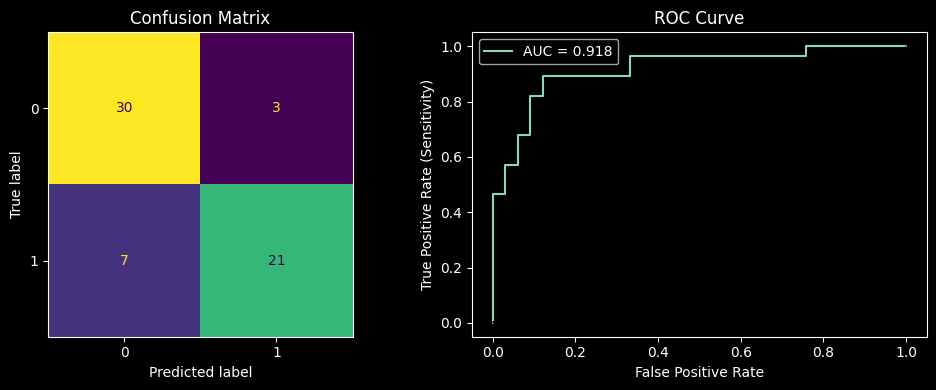

In [ ]:
evaluate_classifier(heart_disease_classifier, X_test, y_test)

Check concentration on both sides of 0.5


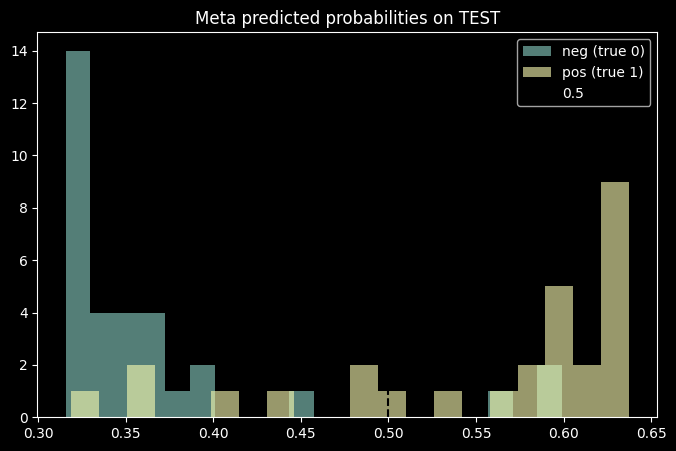

In [ ]:
test_prob = heart_disease_classifier.predict_proba(X_test)[:,1]
plt.figure(figsize=(8,5))
plt.hist(test_prob[y_test==0], bins=20, alpha=0.6, label='neg (true 0)')
plt.hist(test_prob[y_test==1], bins=20, alpha=0.6, label='pos (true 1)')
plt.axvline(0.5, color='k', linestyle='--', label='0.5')
plt.legend(); plt.title('Meta predicted probabilities on TEST')
plt.show()

Calibrate meta learner

In [ ]:
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

final_classifier = CalibratedClassifierCV(heart_disease_classifier, method='sigmoid', cv=cv)
final_classifier.fit(X_train, y_train)

CalibratedClassifierCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
                       estimator=StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
                                                    estimators=[('rf',
                                                                 Pipeline(steps=[('encode',
                                                                                  FeatureEncoder(encode_func=<function encode_features at 0x7a5704760ae0>)),
                                                                                 ('model',
                                                                                  RandomForestClassifier(min_samples_leaf=2,
                                                                                                         min_samples_...
                                                                ('knn',
                                                                 Pipeline(steps=[('encode',
                                                                                  FeatureEncoder(encode_func=<function encode_features at 0x7a5704760ae0>)),
                                                                                 ('scale',
                                                                                  StandardScaler()),
                                                                                 ('model',
                                                                                  KNeighborsClassifier(n_jobs=-1,
                                                                                                       n_neighbors=7,
                                                                                                       weights='distance'))]))],
                                                    final_estimator=LogisticRegression(C=np.float64(0.016982471572084802),
                                                                                       max_iter=1000,
                                                                                       random_state=23),
                                                    n_jobs=-1,
                                                    stack_method='predict_proba'))

Classification Report for CalibratedClassifierCV
Accuracy     : 0.8689
Precision    : 0.8846
Recall       : 0.8214 (Sensitivity)
Specificity  : 0.9091
F1 Score     : 0.8519
ROC AUC      : 0.9307
Confusion Matrix:
 [[30  3]
 [ 5 23]]


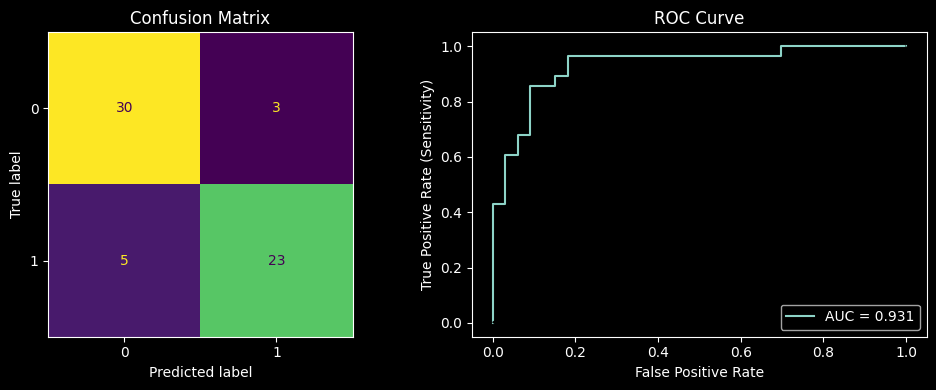

In [ ]:
evaluate_classifier(final_classifier, X_test, y_test)

Final model checks

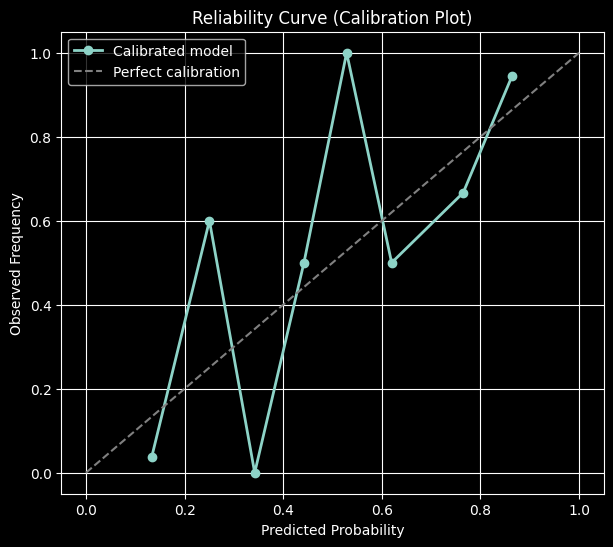

In [ ]:
from sklearn.calibration import calibration_curve

y_prob = final_classifier.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)
plt.figure(figsize=(7,6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=2, label='Calibrated model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect calibration')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequency')
plt.title('Reliability Curve (Calibration Plot)')
plt.legend()
plt.grid(True)
plt.show()

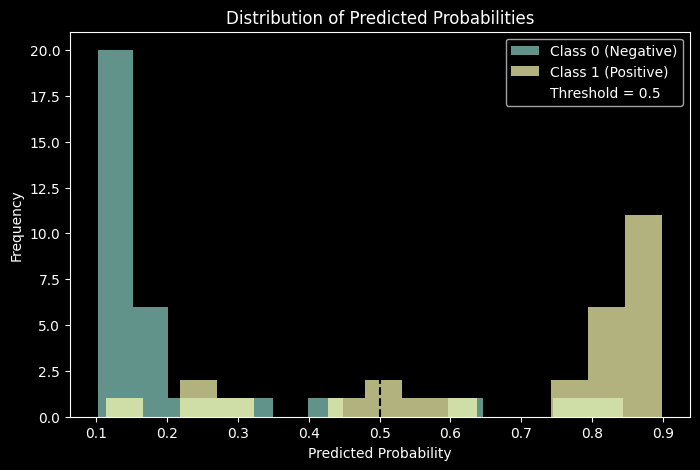

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(y_prob[y_test == 0], bins=15, alpha=0.7, label='Class 0 (Negative)')
plt.hist(y_prob[y_test == 1], bins=15, alpha=0.7, label='Class 1 (Positive)')
plt.axvline(0.5, color='k', linestyle='--', label='Threshold = 0.5')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


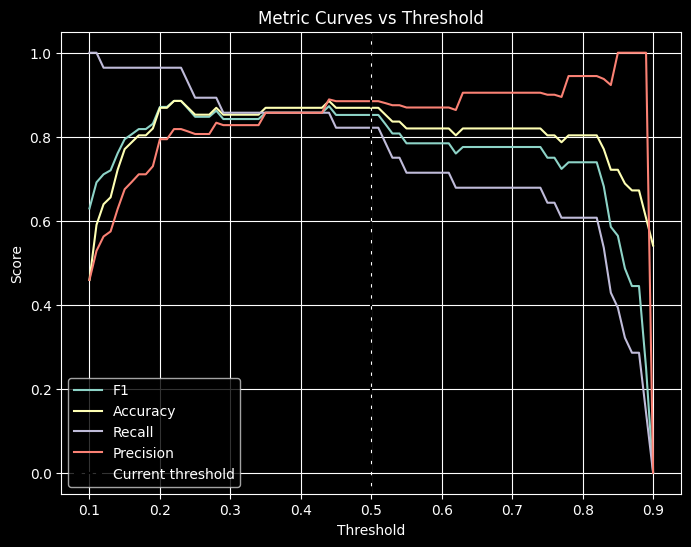

In [ ]:
thresholds = np.linspace(0.1, 0.9, 81)
f1s, accs, recs, precs = [], [], [], []

for t in thresholds:
    preds = (y_prob > t).astype(int)
    f1s.append(f1_score(y_test, preds))
    accs.append(accuracy_score(y_test, preds))
    recs.append(recall_score(y_test, preds))
    precs.append(precision_score(y_test, preds))

plt.figure(figsize=(8,6))
plt.plot(thresholds, f1s, label='F1')
plt.plot(thresholds, accs, label='Accuracy')
plt.plot(thresholds, recs, label='Recall')
plt.plot(thresholds, precs, label='Precision')
plt.axvline(0.5, color='k', linestyle='--', label='Current threshold')
plt.xlabel('Threshold'); plt.ylabel('Score')
plt.legend(); plt.title('Metric Curves vs Threshold')
plt.grid(True); plt.show()